In [1]:
from dolfin import *
import numpy as np 

LENGTH = 1.0
WIDTH = 0.2
HIGHT = 0.1

LAMA_MU = 1.0
LAMA_LAMBDA = 1.25

In [2]:
# 定义本构
def epsilon(u):
    engineering_strain = 0.5 * (nabla_grad(u) + nabla_grad(u).T)
    return engineering_strain

def sigma(u):
    cauchy_stress = LAMA_LAMBDA * tr(epsilon(u))*Identity(2) + 2 * LAMA_MU * epsilon(u)
    return cauchy_stress

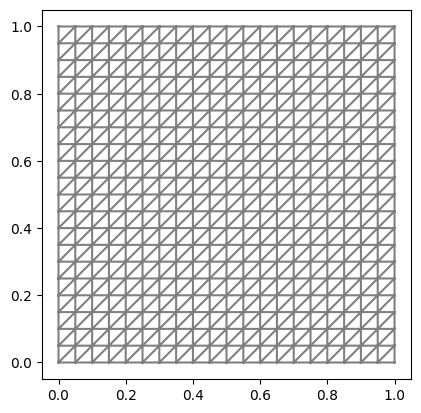

In [3]:
# 创建网格并显示
mesh = UnitSquareMesh(20, 20) 
V = VectorFunctionSpace(mesh, "Lagrange", 1)
plot(mesh)

In [4]:
# 狄利克雷边界
def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < DOLFIN_EPS

bc = DirichletBC(V, Constant((0.0, 0.0)), clamped_boundary)

# 自然边界
class RightEnd(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 1) < DOLFIN_EPS and (abs(x[1] - 0.5) < 0.1)
right_end_boundary = RightEnd()

class TopEnd(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 0.5) < 0.1 and (abs(x[1] - 1) < DOLFIN_EPS)
top_end_boundary = TopEnd()

boundary_mark = MeshFunction("size_t", mesh, mesh.topology().dim()-1)
boundary_mark.set_all(0)
right_end_boundary.mark(boundary_mark, 1)
top_end_boundary.mark(boundary_mark, 2)

# expression = Expression(Constant((0.0, 0.2)), degree=2)
# expression = Constant((0.0, 1.0))
# u_ex = project(expression, V
# plot(u_ex, title="forcing vectors")

In [5]:
u_trial = TrialFunction(V)
v_test = TestFunction(V)

In [6]:
forcing = Constant((50, 0))
forcing2 = Constant((0, 10))

In [7]:
lhs = inner(sigma(u_trial), nabla_grad(v_test)) * dx
# rhs = dot(forcing, v_test) * dx
rhs = (dot(forcing, v_test) * ds(subdomain_data=boundary_mark, domain=mesh, subdomain_id=1)
       +
       dot(forcing2, v_test) * ds(subdomain_data=boundary_mark, domain=mesh, subdomain_id=2))
# rhs = dot(forcing, v_test) * dx


# plot(rhs)

Solving linear variational problem.
max u: 668.9336214747838


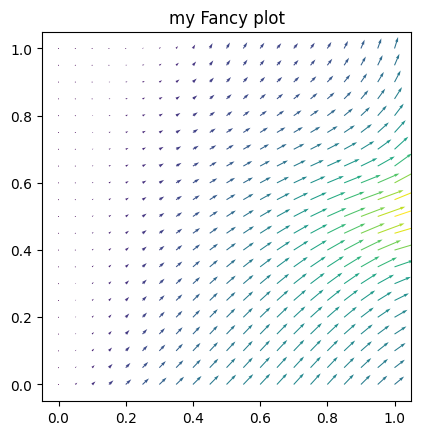

In [8]:
u_solution = Function(V)

problem = LinearVariationalProblem(lhs, rhs, u_solution, bcs=[bc])
solver = LinearVariationalSolver(problem)
solver.solve()

plot(u_solution,
     title = "my Fancy plot")

print("max u: " + str(u_solution.vector().max()))

# print(u_solution.vector()[:])